Import required libraries.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import  Input, BatchNormalization, Conv2D
from tensorflow.keras.layers import Dense, MaxPool2D, GlobalAvgPool2D

We are importing dataset from tensorflow command as mnist is already integrated in tensorflow we do not have to download it seperately.

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


Printing a small part of the MNIST dataset.

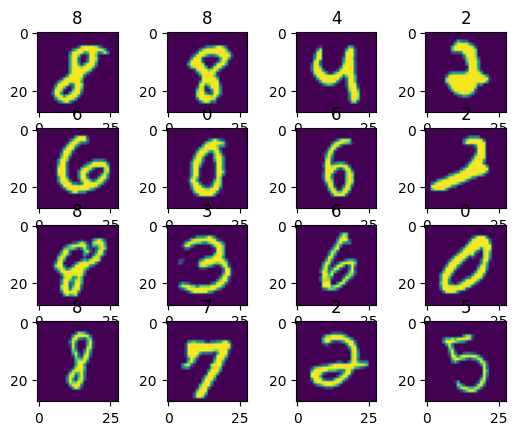

In [3]:
plt.figure()

for i in range(16):
    
    index = np.random.randint(0, x_train.shape[0] - 1)
    plt.subplot(4,4, i+1)
    plt.title(str(y_train[index]))
    plt.imshow(x_train[index])

plt.show()

Using CNN algorithm

In [4]:
model = tf.keras.Sequential(
    [
        # Experimenting on these layers to see how diffrently it trains and which model is better
        
        Input(shape=(28, 28, 1)),                                                # this is actualy 4D. 1 layer of no. of batches is hidden
        
        Conv2D(512, (3, 3), activation='relu'),                                  #1 layer and 100 samples
        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(512, activation='relu'),
        Dense(32, activation='softmax')
    ]
)

In [5]:
x_train = x_train.astype('float') / 255                                          #0 and 255 are corresponting to black and white respectively
x_test = x_test.astype('float') / 255

x_train = np.expand_dims(x_train, axis=-1)                                       #adding another dimension at the end to make it work with Conv2D which expects a 4D tensor
x_test = np.expand_dims(x_test, axis=-1)

Choosing optimizer

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')     

Model Training with 5 epochs and 50 batch size

In [7]:
model.fit(x_train, y_train, batch_size=50, epochs=5, validation_split=0.2)    

Epoch 1/5
960/960 [==============================] - 615s 640ms/step - loss: 0.9363 - accuracy: 0.6775 - val_loss: 0.7818 - val_accuracy: 0.7143
Epoch 2/5
960/960 [==============================] - 261s 272ms/step - loss: 0.4864 - accuracy: 0.8404 - val_loss: 1.5608 - val_accuracy: 0.5448
Epoch 3/5
960/960 [==============================] - 207s 216ms/step - loss: 0.3881 - accuracy: 0.8706 - val_loss: 0.5081 - val_accuracy: 0.8156
Epoch 4/5
960/960 [==============================] - 208s 216ms/step - loss: 0.3347 - accuracy: 0.8896 - val_loss: 0.7413 - val_accuracy: 0.7539
Epoch 5/5
960/960 [==============================] - 207s 216ms/step - loss: 0.3019 - accuracy: 0.9011 - val_loss: 0.4147 - val_accuracy: 0.8641


Evaluation on test set

In [8]:
model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 13s 62ms/step - loss: 0.4179 - accuracy: 0.8628


[0.417938232421875, 0.8628000020980835]